# Controlling basic figure aesthetics when building plots

This section will work through some basic steps for controlling figure aesthetics. We will set up some randomly generated data using the [Numpy random module](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).



In [ ]:
# import necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



There are a caveats to keep in mind when working with a notebook:

- In general, you will want to keep all code for a single figure within a single cell
- Displaying a figure will work differently if you download and run this notebook as a `.py` file: you will need to include `plt.show()`

## Generate random data

Here, we're using a random number generator to create three normal distributions of floats, and two categorical arrays.

Don't worry about the random number generator logic; that's intermediate to advanced Python and not important for today's session!

To turn each of our `array` objects that hold these random samples into a nice format to work with, we create a `dictionary` object and use this to build a `DataFrame` using the pandas library.

In later sessions, we will replace the following data creation work with some code to load real data.

In [ ]:
# construct random number generator
# see https://numpy.org/doc/stable/reference/random/generator.html

# set random seed for reproducibility
random_seed = 42

rng = np.random.default_rng(random_seed)
print(rng)

size = 100

# a normal distribution
mu, sigma = 50, 35 # mean and standard deviation
dist_1 = rng.normal(mu, sigma, size)

# a normal distribution
mu2, sigma2 = 40, 50 # mean and standard deviation
dist_2 = rng.normal(mu2, sigma2, size)

# a normal distribution
mu3, sigma3 = 85, 15 # mean and standard deviation
dist_3 = rng.normal(mu3, sigma3, size)

# create category variables
cat_labels = ["Cat. 1", "Cat. 2", "Cat. 3", "Cat. 4"]
group_labels = ["Group 1", "Group 2", "Group 3", "Group 4"]

# randomly select them
categories = rng.choice(cat_labels, size=size)
groups = rng.choice(group_labels, size=size)

# create a dictionary
data_dictionary = {
    "Distribution 1": dist_1,
    "Distribution 2": dist_2,
    "Distribution 3": dist_3,
    "Categories": categories,
    "Groups": groups,
}

# turn this dictionary into a data frame
data = pd.DataFrame(data_dictionary)

Generator(PCG64)


In [ ]:
# check that the data frame looks sensible
data

,Distribution 1,Distribution 2,Distribution 3,Categories,Groups
0,60.665098,21.091872,90.063618,Cat. 3,Group 4
1,13.600556,104.961415,106.112228,Cat. 1,Group 1
2,76.265792,22.186801,86.358774,Cat. 2,Group 3
3,82.919765,76.875778,94.659082,Cat. 2,Group 1
4,-18.286232,-6.680884,54.247418,Cat. 3,Group 2
...,...,...,...,...,...
95,-0.648937,-4.736351,87.647686,Cat. 3,Group 4
96,3.705514,72.166340,89.439910,Cat. 1,Group 1
97,15.096361,20.269744,79.421281,Cat. 4,Group 3
98,63.992098,39.743907,58.649173,Cat. 4,Group 1


## Matplotlib Basics

There are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

From Matplotlib [docs](https://matplotlib.org/stable/users/explain/quick_start.html):

> Matplotlib's documentation and examples use both the OO and the pyplot styles. In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project. However, the pyplot style can be very convenient for quick interactive work.

We will run through one example using the pyplot approach, but will focus on the object-oriented approach for the rest of the course.

For the next few examples, we're going to plot "Distribution 1" against "Distribution 2". We can access these "columns" of our data frame using the following notation:



```
# Distribution 1
data["Distribution 1"]

# Distribution 2
data["Distribution 2"]
```



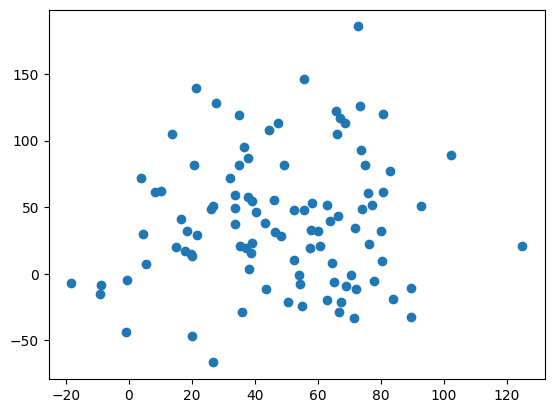

In [ ]:
# pyplot approach

plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"])

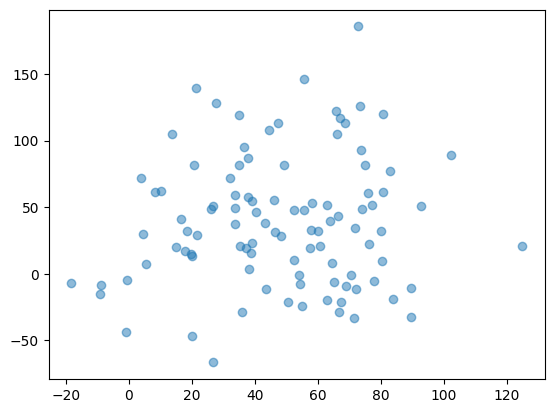

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap

plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.5)

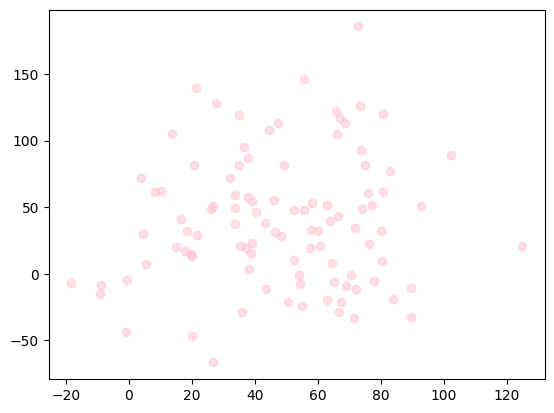

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html

plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.5,
            color="pink")

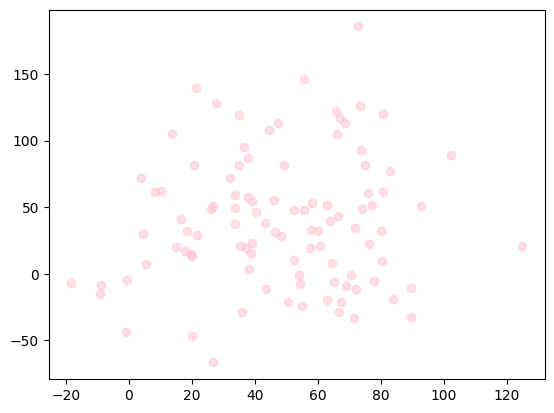

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.5,
            color="#FFC0CB")

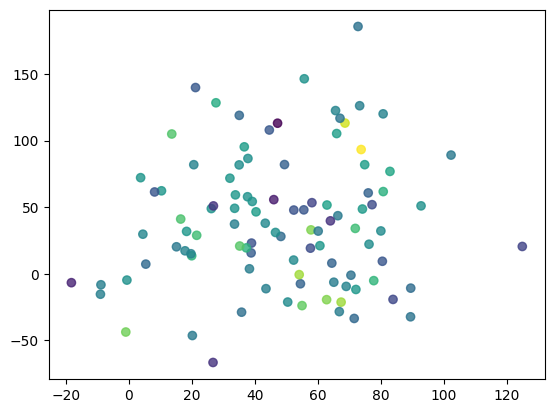

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.8,
            c=data["Distribution 3"])

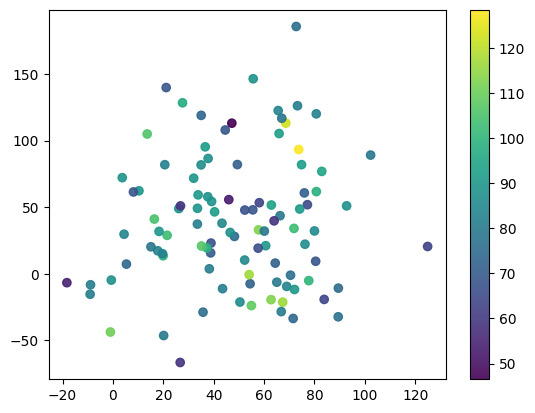

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"])
plt.colorbar()

Text(0.5, 1.0, 'Example Plot')

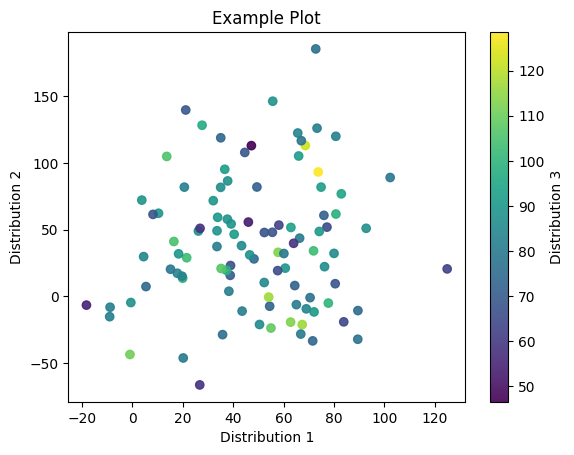

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"
# we also need to add axes labels and a title


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"])
plt.colorbar(label="Distribution 3")
plt.xlabel("Distribution 1")
plt.ylabel("Distribution 2")
plt.title("Example Plot")

Text(0.5, 1.0, 'Example Plot')

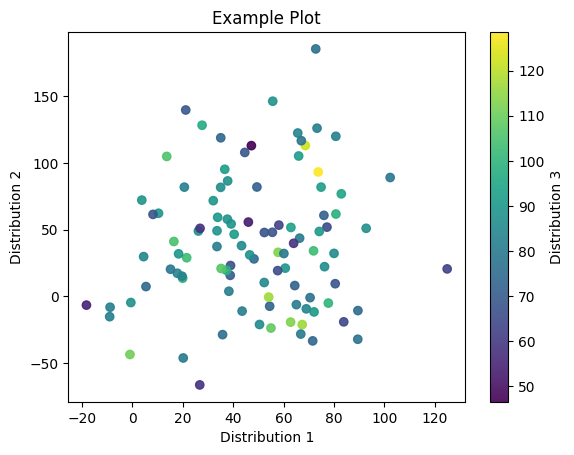

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"
# we also need to add axes labels and a title


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"])
plt.colorbar(label="Distribution 3")
plt.xlabel("Distribution 1")
plt.ylabel("Distribution 2")
plt.title("Example Plot")

Text(0.5, 1.0, 'Example Plot')

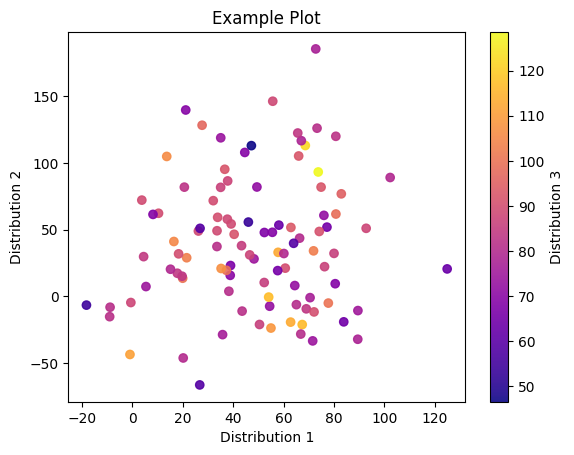

In [ ]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"
# we also need to add axes labels and a title
# We can change the colour map used with the argument "cmap": https://matplotlib.org/stable/users/explain/colors/colormaps.html


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")
plt.colorbar(label="Distribution 3")
plt.xlabel("Distribution 1")
plt.ylabel("Distribution 2")
plt.title("Example Plot")

### Moving to an o o approach

As you can see, the pyplot approach is a quick and easy way to plot your data: you can get a crude plot with a single line of code


```
plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"])
```

However, as we relying on pyplot to handle some of the background settings, it can be difficult to fine-tune and tweak plots with this interface.

A more "Pythonic" way uses the object-oriented (o o) interface. Read more [here](https://matplotlib.org/stable/users/explain/quick_start.html#the-explicit-and-the-implicit-interfaces).

Before we look at how to build a figure using the o o interface, let's look at the components involved.

![Anatomy of a figure](https://matplotlib.org/stable/_images/anatomy.png)

*From [Matplotlib documentation](https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure)*

1. **figure** - the **figure** is like the sheet of paper where everything else is drawn on top of. It's a box where all the parts of the figure are stored.
2. **axes** - the **axes** are the area in which the data is plotted. This can be thought of like a "panel" of the plot; there can be one or many.
3. **axis** - each **axes** contains (usually) two **axis** objects - these are the x and y axes of your plot, and contain features like labels, and tick locators.

|       |   |  **figure** object  |   |   |
|-------|---|---------------------|---|---|
|       |   | **axes** objects   |   |    |
| xaxis | yaxis | xlabel | ylabel | spines |


**So to begin, we need to define the figure, then the axes, then we can set features related to each of these objects.**

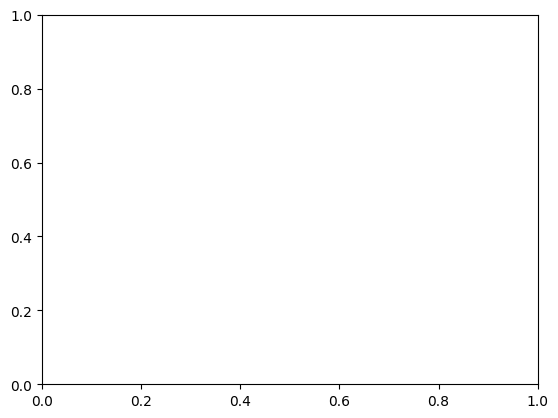

In [ ]:
# first we define the figure and axes objects

fig, ax = plt.subplots()